In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('ggplot')

In [2]:
y_data = pd.read_csv('responses.csv')
y_data.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [3]:
smoking_id = y_data['Smoking'].unique()
alc_id = y_data['Alcohol'].unique()
print smoking_id, '\n', alc_id

['never smoked' 'tried smoking' 'former smoker' 'current smoker' nan] 
['drink a lot' 'social drinker' 'never' nan]


We are going to convert the smoking and alc responses to numerical values. 0 being 'never' and 5 being 'a lot'

In [4]:
life_dict = {'never smoked': 5, 'tried smoking': 4, 'former smoker': 2, 'current smoker': 0,'never': 5, 'social drinker': 3, 'drink a lot': 0}

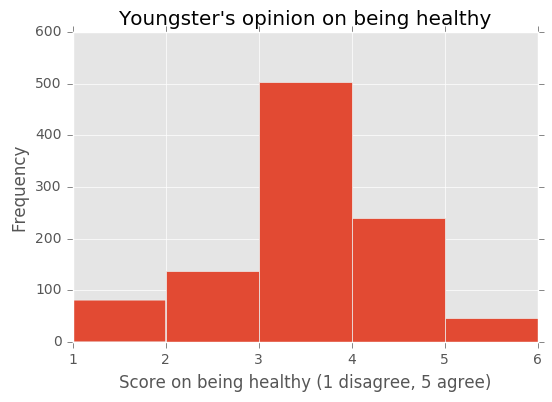

In [5]:
y_data.hist(column='Healthy eating', bins=np.arange(1, 7, 1))
plt.xlabel('Score on being healthy (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s opinion on being healthy')
plt.show()

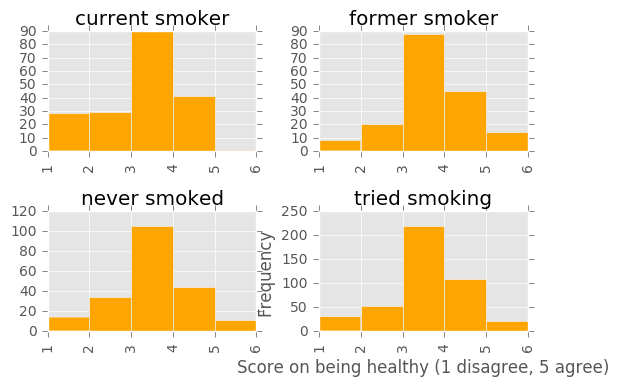

In [6]:
y_data.hist(column='Healthy eating', by='Smoking', color = 'orange', bins=np.arange(1, 7, 1))
plt.ylim((0,250))
plt.xlabel('Score on being healthy (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.show()

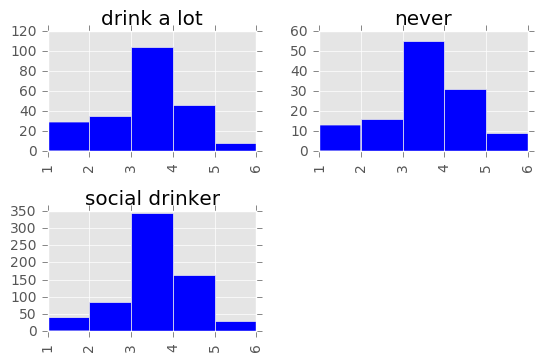

In [7]:
y_data.hist(column='Healthy eating', by='Alcohol', color = 'Blue', bins=np.arange(1, 7, 1))
plt.ylim((0,250))
plt.show()

Convert the smoking and alcohol into numeric, and then put them together

In [8]:
for index, row in y_data.iterrows():
    try:
        val = life_dict[row['Alcohol']] + life_dict[row['Smoking']]
        y_data.loc[index,'Life health'] = val
    except:
        y_data.loc[index,'Life health'] = np.nan
    

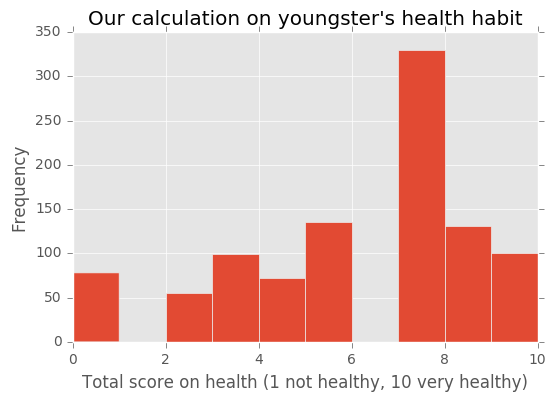

In [9]:
y_data['Life health'].plot.hist(bins = np.linspace(0, 10, 11))
plt.xlabel('Total score on health (1 not healthy, 10 very healthy)')
plt.ylabel('Frequency')
plt.title('Our calculation on youngster\'s health habit')
plt.show()

In [10]:
t1 = y_data.dropna()

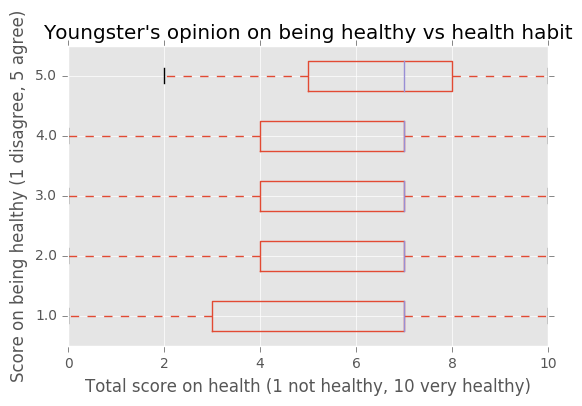

In [11]:
t1.boxplot(column='Life health', by='Healthy eating', vert=False)
plt.xlabel('Total score on health (1 not healthy, 10 very healthy)')
plt.ylabel('Score on being healthy (1 disagree, 5 agree)')
plt.title('Youngster\'s opinion on being healthy vs health habit')
plt.suptitle('')
plt.show()

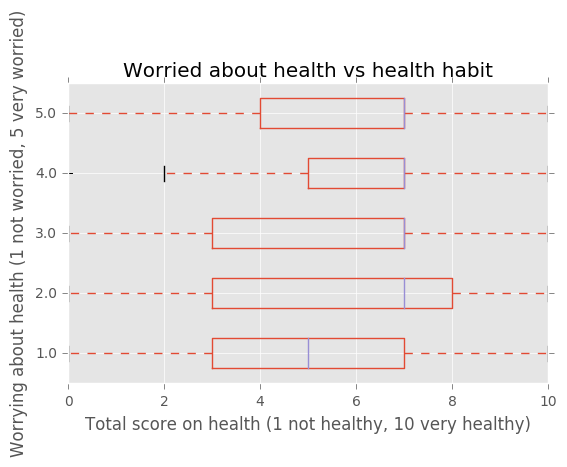

In [12]:
t1.boxplot(column='Life health', by='Health', vert=False)
plt.xlabel('Total score on health (1 not healthy, 10 very healthy)')
plt.ylabel('Worrying about health (1 not worried, 5 very worried)')
plt.title('Worried about health vs health habit')
plt.suptitle('')
plt.show()

We see that young people who are not worried about their health have a lower health rate

In [13]:
age_finance2 = pd.DataFrame(0, index = xrange(0,4) ,columns = xrange(1,6))

In [14]:
for index, row in y_data.iterrows():
    f_num = row['Finances']
    a_num = row['Age']
    if np.isnan(f_num) or np.isnan(a_num):
        continue
    else:
        f_num = int(f_num)
        a_num = int(a_num)
    age_finance2.loc[math.floor((a_num-15)/4),f_num]+=1

In [15]:
totals2 = age_finance2.sum(axis = 1)
looplist = [(x,y) for x in xrange(0,4) for y in xrange(1,6)]
for x,y in looplist:
        age_finance2.loc[x,y] = float(age_finance2.loc[x,y])/totals2[x]

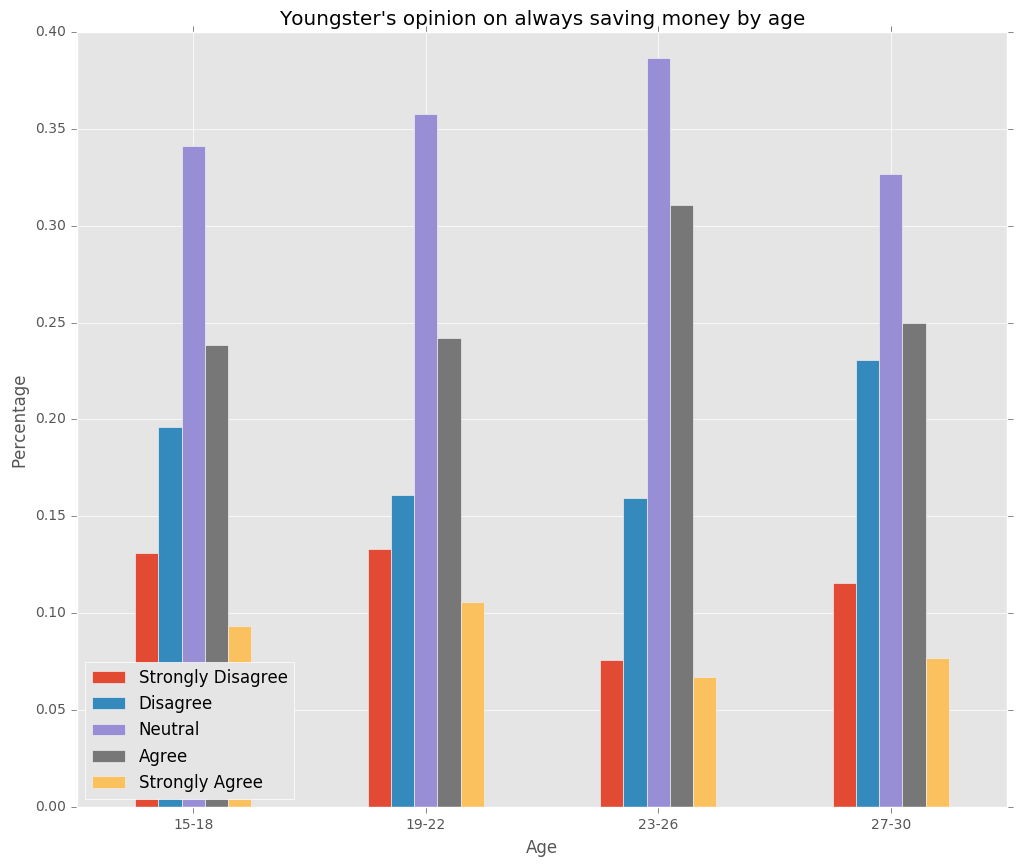

In [16]:
age_finance2.plot(kind='bar', figsize = (12,10), rot=0)
plt.xticks(list(age_finance2.index), ['15-18', '19-22', '23-26', '27-30'])
plt.legend(["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"], loc = 'lower left')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.title('Youngster\'s opinion on always saving money by age')
plt.show()

We can see from this graph that as Age increases, the opinion on saving money also increases.

Lets look at the spending between entertainment, looks, gadgets, and healthy eating. First, a side by side bar plot, then individual plots

In [17]:
spendings = y_data.keys()[136:140]
print spendings

Index([u'Entertainment spending', u'Spending on looks', u'Spending on gadgets',
       u'Spending on healthy eating'],
      dtype='object')


In [18]:
df_spend = pd.DataFrame()
for x in spendings:
    nums = y_data[x].value_counts()
    df_nums = nums.to_frame()
    if df_spend.empty:
        df_spend = nums.to_frame()
    else:
        df_spend = pd.merge(df_spend, df_nums, right_index = True, left_index = True)
    

In [19]:
df_list = list(df_spend)
df_spend2 = pd.DataFrame(0, index = xrange(1,6) ,columns = df_list)
df_total = df_spend.sum(axis = 0)

In [20]:
looplist = [(x,y) for x in xrange(1,6) for y in df_list]

In [21]:
looplist

[(1, 'Entertainment spending'),
 (1, 'Spending on looks'),
 (1, 'Spending on gadgets'),
 (1, 'Spending on healthy eating'),
 (2, 'Entertainment spending'),
 (2, 'Spending on looks'),
 (2, 'Spending on gadgets'),
 (2, 'Spending on healthy eating'),
 (3, 'Entertainment spending'),
 (3, 'Spending on looks'),
 (3, 'Spending on gadgets'),
 (3, 'Spending on healthy eating'),
 (4, 'Entertainment spending'),
 (4, 'Spending on looks'),
 (4, 'Spending on gadgets'),
 (4, 'Spending on healthy eating'),
 (5, 'Entertainment spending'),
 (5, 'Spending on looks'),
 (5, 'Spending on gadgets'),
 (5, 'Spending on healthy eating')]

In [22]:
for x,y in looplist:
        df_spend2.loc[x,y] = float(df_spend.loc[float(x),y])/df_total[y]

In [23]:
df_spend3 = df_spend2.transpose()

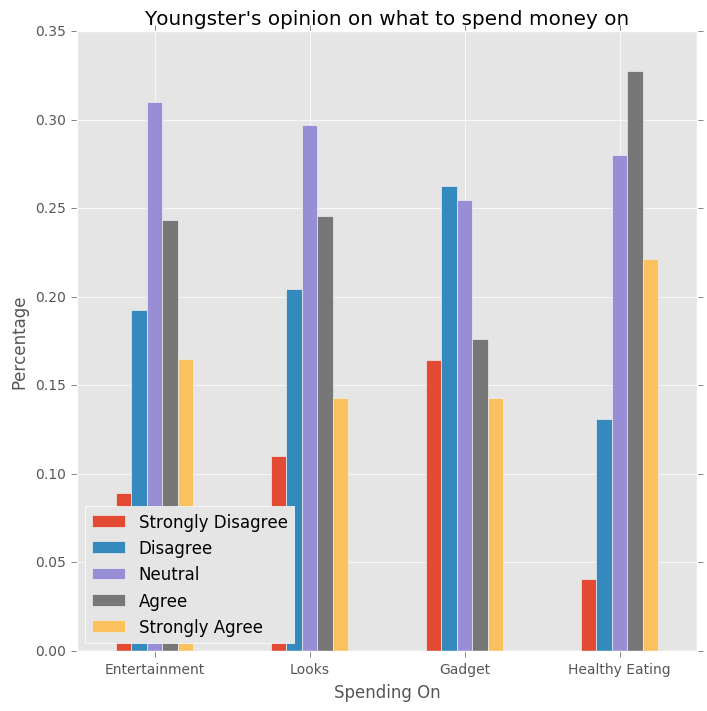

In [24]:
df_spend3.plot(kind='bar', figsize = (8,8), rot = 0)
plt.xticks(list(age_finance2.index), ['Entertainment', 'Looks', 'Gadget', 'Healthy Eating'])
plt.legend(["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"], loc = 'lower left')
plt.xlabel('Spending On')
plt.ylabel('Percentage')
plt.title('Youngster\'s opinion on what to spend money on')
plt.show()

It seems that the young people prefer spending more on healthy eating, as seen by the distribution of the Healthy Eating survery result. Meanwhile, spending money on Gadget has a much higher "Strongly Disagree" percentage.

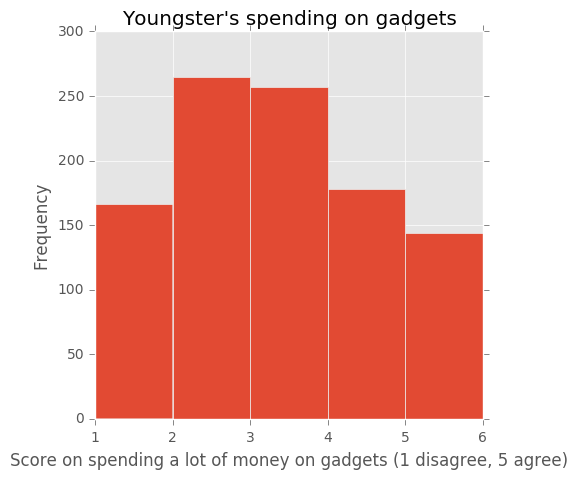

In [25]:
y_data.hist(column='Spending on gadgets', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on gadgets (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on gadgets')
plt.show()

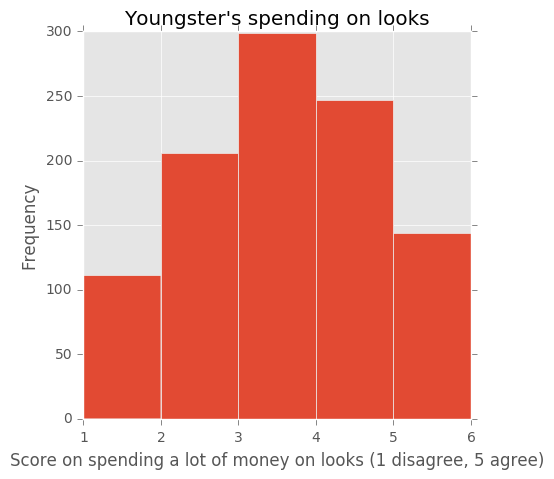

In [26]:
y_data.hist(column='Spending on looks', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on looks (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on looks')
plt.show()

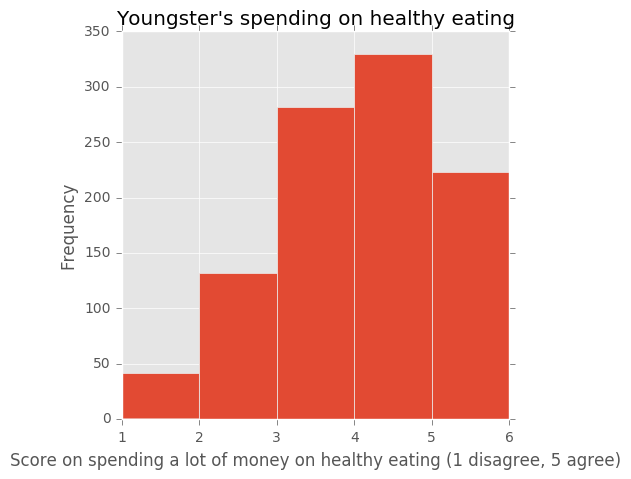

In [27]:
y_data.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on healthy eating (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on healthy eating')
plt.show()

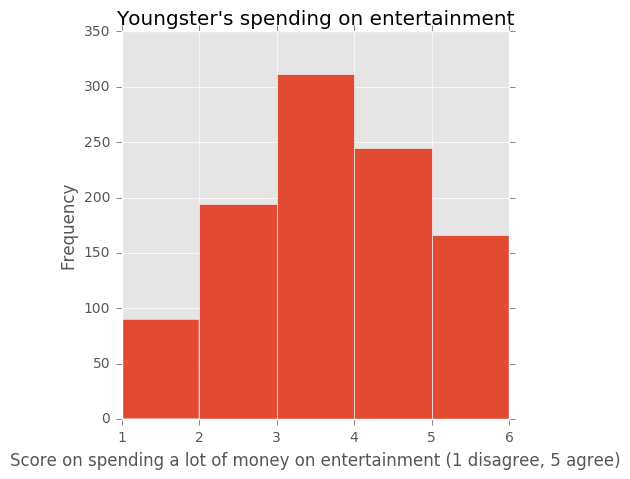

In [28]:
y_data.hist(column='Entertainment spending', bins=np.arange(1, 7, 1), figsize = (5,5))
plt.xlabel('Score on spending a lot of money on entertainment (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s spending on entertainment')
plt.show()

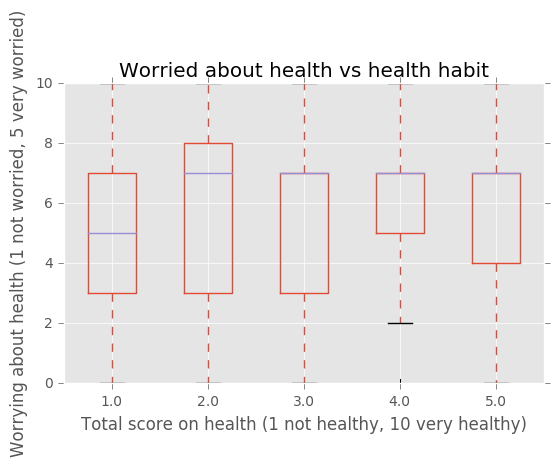

In [29]:
t1.boxplot(column='Life health', by='Health')#, vert=False)
plt.xlabel('Total score on health (1 not healthy, 10 very healthy)')
plt.ylabel('Worrying about health (1 not worried, 5 very worried)')
plt.title('Worried about health vs health habit')
plt.suptitle('')
plt.show()

<h3> - Are healthy people interested in academics? What about Adrenaline sports? (quite possibly - #31) Do they play sports at a 
leisure/competetive level? (23/24) If so, we could gear sports related ads towards them. </h3>

In [30]:
health_sport = y_data[y_data['Life health'] > 6][['Passive sport', 'Active sport', 'Adrenaline sports']]

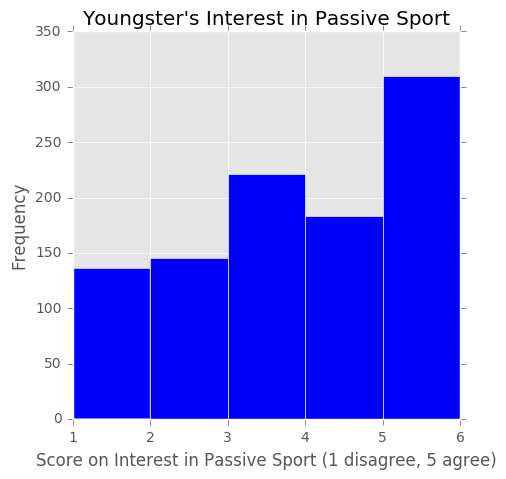

In [31]:
y_data.hist(column='Passive sport', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Blue')
plt.xlabel('Score on Interest in Passive Sport (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s Interest in Passive Sport')
plt.show()

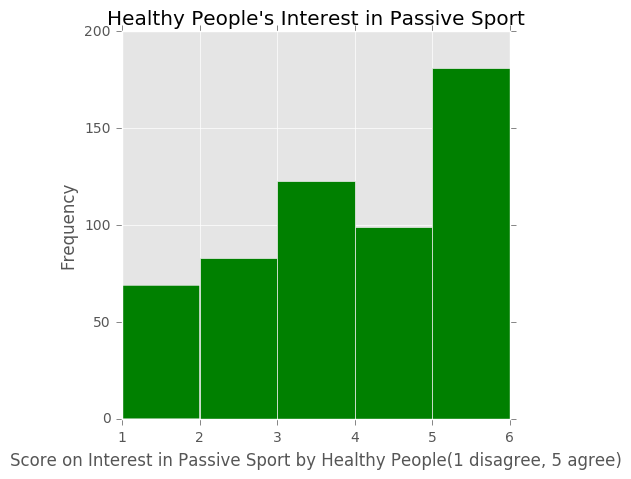

In [32]:
health_sport.hist(column='Passive sport', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Green')
plt.xlabel('Score on Interest in Passive Sport by Healthy People(1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Healthy People\'s Interest in Passive Sport')
plt.show()

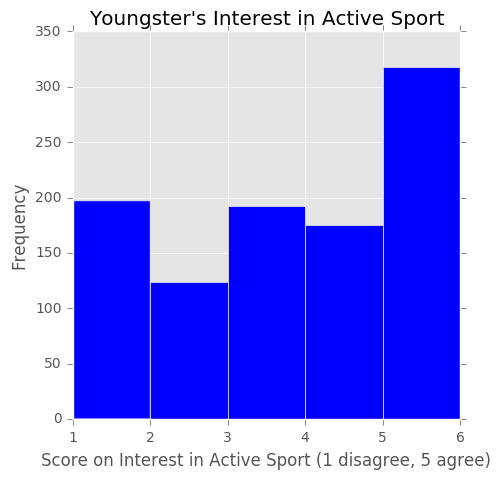

In [33]:
y_data.hist(column='Active sport', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Blue')
plt.xlabel('Score on Interest in Active Sport (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s Interest in Active Sport')
plt.show()

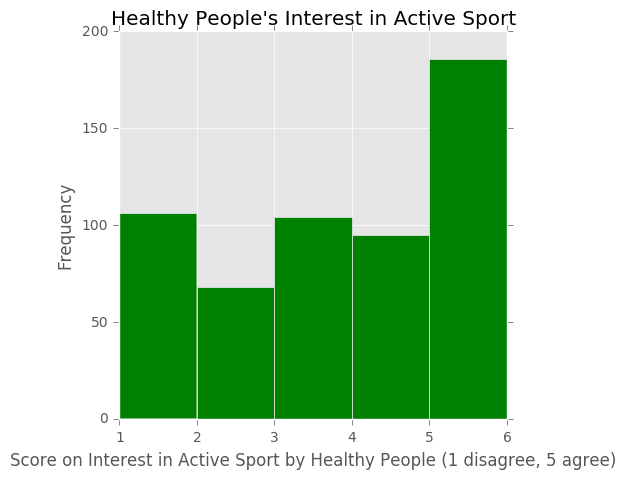

In [34]:
health_sport.hist(column='Active sport', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Green')
plt.xlabel('Score on Interest in Active Sport by Healthy People (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Healthy People\'s Interest in Active Sport')
plt.show()

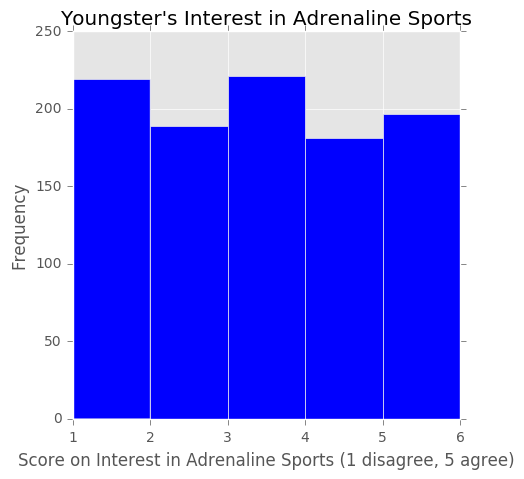

In [35]:
y_data.hist(column='Adrenaline sports', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Blue')
plt.xlabel('Score on Interest in Adrenaline Sports (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Youngster\'s Interest in Adrenaline Sports')
plt.show()

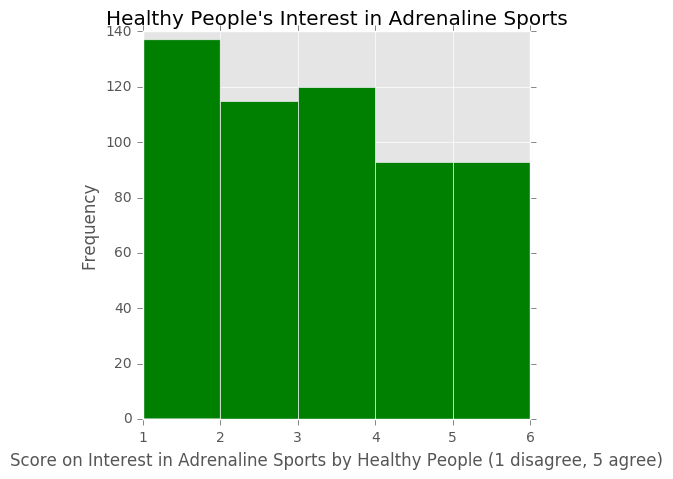

In [36]:
health_sport.hist(column='Adrenaline sports', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Green')
plt.xlabel('Score on Interest in Adrenaline Sports by Healthy People (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Healthy People\'s Interest in Adrenaline Sports')
plt.show()

<h3> For smokers </h3>

In [37]:
smokers = y_data[y_data['Smoking'].str.contains('smoker', na = False)][['Alcohol', 'Spending on healthy eating', 'Passive sport', 'Active sport']]

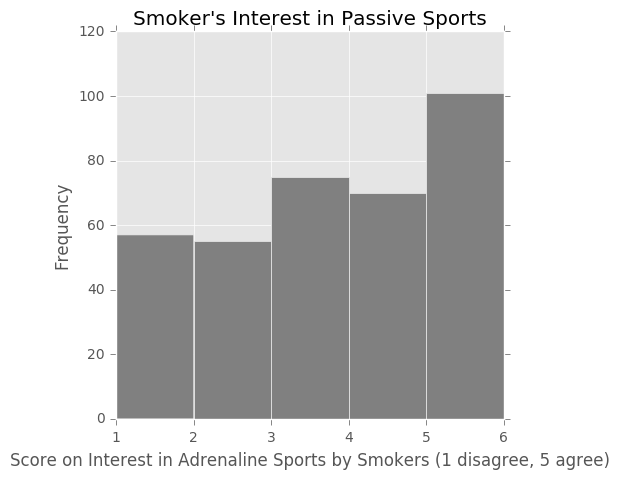

In [38]:
smokers.hist(column='Passive sport', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Grey')
plt.xlabel('Score on Interest in Adrenaline Sports by Smokers (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Smoker\'s Interest in Passive Sports')
plt.show()

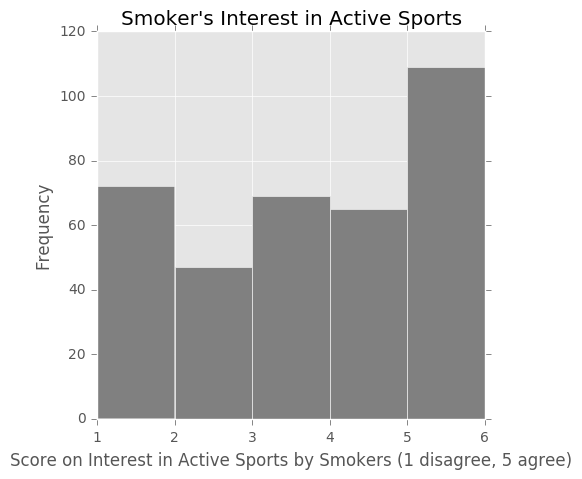

In [39]:
smokers.hist(column='Active sport', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Grey')
plt.xlabel('Score on Interest in Active Sports by Smokers (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Smoker\'s Interest in Active Sports')
plt.show()

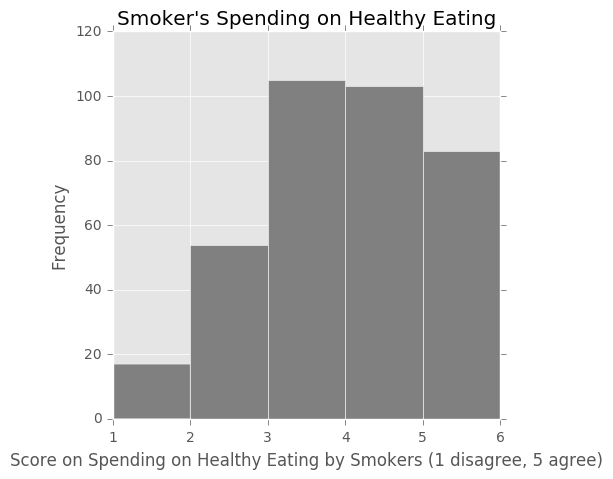

In [40]:
smokers.hist(column='Spending on healthy eating', bins=np.arange(1, 7, 1), figsize = (5,5), color = 'Grey')
plt.xlabel('Score on Spending on Healthy Eating by Smokers (1 disagree, 5 agree)')
plt.ylabel('Frequency')
plt.title('Smoker\'s Spending on Healthy Eating')
plt.show()

In [41]:
smokers['Alcohol'].value_counts()

social drinker    208
drink a lot       133
never              22
Name: Alcohol, dtype: int64

In [42]:
f_data = y_data[y_data['Gender'] == 'female'][["Friends versus money", "Decision making", "Eating to survive", "Giving", "Charity", "Appearence and gestures", "Finding lost valuables", "Finances", "Shopping centres", "Branded clothing", "Entertainment spending", "Spending on looks", "Spending on gadgets", "Spending on healthy eating"]]
f_data.shape

(593, 14)

In [43]:
m_data = y_data[y_data['Gender'] == 'male'][["Friends versus money", "Decision making", "Eating to survive", "Giving", "Charity", "Appearence and gestures", "Finding lost valuables", "Finances", "Shopping centres", "Branded clothing", "Entertainment spending", "Spending on looks", "Spending on gadgets", "Spending on healthy eating"]]
m_data.shape

(411, 14)

In [44]:
list(m_data)

['Friends versus money',
 'Decision making',
 'Eating to survive',
 'Giving',
 'Charity',
 'Appearence and gestures',
 'Finding lost valuables',
 'Finances',
 'Shopping centres',
 'Branded clothing',
 'Entertainment spending',
 'Spending on looks',
 'Spending on gadgets',
 'Spending on healthy eating']

In [45]:
print m_data.count()

Friends versus money          408
Decision making               409
Eating to survive             411
Giving                        409
Charity                       408
Appearence and gestures       411
Finding lost valuables        409
Finances                      410
Shopping centres              411
Branded clothing              411
Entertainment spending        409
Spending on looks             409
Spending on gadgets           411
Spending on healthy eating    410
dtype: int64


In [46]:
print f_data.count()

Friends versus money          590
Decision making               592
Eating to survive             593
Giving                        589
Charity                       593
Appearence and gestures       590
Finding lost valuables        591
Finances                      591
Shopping centres              591
Branded clothing              591
Entertainment spending        592
Spending on looks             592
Spending on gadgets           593
Spending on healthy eating    592
dtype: int64


In [47]:
study_col = list(f_data)
f_study = pd.DataFrame(0, index = xrange(1,6) ,columns = study_col)
m_study = pd.DataFrame(0, index = xrange(1,6) ,columns = study_col)

In [48]:
for index, row in f_data.iterrows():
    for y in study_col:
        try:
            f_study.loc[row,y] += 1
        except:
            continue

In [49]:
for index, row in m_data.iterrows():
    for y in study_col:
        try:
            m_study.loc[row,y] += 1
        except:
            continue

In [50]:
f_total = f_study.sum(axis = 0)
m_total = m_study.sum(axis = 0)

In [51]:
def gender_study(df_s, df_t, x , y):
        df_s.loc[x,y] = float(df_s.loc[x,y])/df_t[y]
        return None

In [52]:
[gender_study(f_study, f_total, x,y) for x in xrange(1,6) for y in study_col]
f_study

,Friends versus money,Decision making,Eating to survive,Giving,Charity,Appearence and gestures,Finding lost valuables,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
1,0.177979,0.177979,0.177979,0.177979,0.177979,0.177979,0.177979,0.177979,0.177979,0.177979,0.177979,0.177979,0.177979,0.177979
2,0.198500,0.198500,0.198500,0.198500,0.198500,0.198500,0.198500,0.198500,0.198500,0.198500,0.198500,0.198500,0.198500,0.198500
3,0.221389,0.221389,0.221389,0.221389,0.221389,0.221389,0.221389,0.221389,0.221389,0.221389,0.221389,0.221389,0.221389,0.221389
4,0.209945,0.209945,0.209945,0.209945,0.209945,0.209945,0.209945,0.209945,0.209945,0.209945,0.209945,0.209945,0.209945,0.209945
5,0.192186,0.192186,0.192186,0.192186,0.192186,0.192186,0.192186,0.192186,0.192186,0.192186,0.192186,0.192186,0.192186,0.192186


In [53]:
[gender_study(m_study, m_total, x,y) for x in xrange(1,6) for y in study_col]
m_study

,Friends versus money,Decision making,Eating to survive,Giving,Charity,Appearence and gestures,Finding lost valuables,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating
1,0.183566,0.183566,0.183566,0.183566,0.183566,0.183566,0.183566,0.183566,0.183566,0.183566,0.183566,0.183566,0.183566,0.183566
2,0.205711,0.205711,0.205711,0.205711,0.205711,0.205711,0.205711,0.205711,0.205711,0.205711,0.205711,0.205711,0.205711,0.205711
3,0.223776,0.223776,0.223776,0.223776,0.223776,0.223776,0.223776,0.223776,0.223776,0.223776,0.223776,0.223776,0.223776,0.223776
4,0.210956,0.210956,0.210956,0.210956,0.210956,0.210956,0.210956,0.210956,0.210956,0.210956,0.210956,0.210956,0.210956,0.210956
5,0.175991,0.175991,0.175991,0.175991,0.175991,0.175991,0.175991,0.175991,0.175991,0.175991,0.175991,0.175991,0.175991,0.175991


In [54]:
f_study.sum()

Friends versus money          1.0
Decision making               1.0
Eating to survive             1.0
Giving                        1.0
Charity                       1.0
Appearence and gestures       1.0
Finding lost valuables        1.0
Finances                      1.0
Shopping centres              1.0
Branded clothing              1.0
Entertainment spending        1.0
Spending on looks             1.0
Spending on gadgets           1.0
Spending on healthy eating    1.0
dtype: float64

In [55]:
m_study.sum()

Friends versus money          1.0
Decision making               1.0
Eating to survive             1.0
Giving                        1.0
Charity                       1.0
Appearence and gestures       1.0
Finding lost valuables        1.0
Finances                      1.0
Shopping centres              1.0
Branded clothing              1.0
Entertainment spending        1.0
Spending on looks             1.0
Spending on gadgets           1.0
Spending on healthy eating    1.0
dtype: float64

Confirm the data is converted to percentage since all of the data adds up to 1.

In [56]:
bar_width = 0.3
bar_locations = np.arange(1,6)

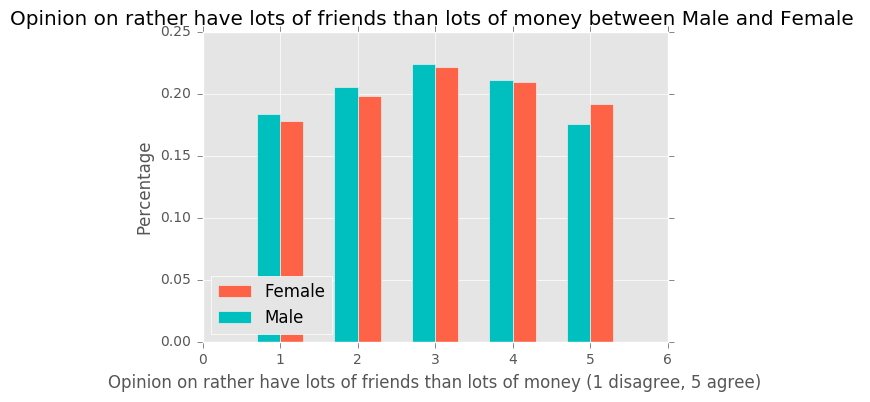

In [78]:
plt.bar(bar_locations, f_study['Friends versus money'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Friends versus money'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on rather have lots of friends than lots of money (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on rather have lots of friends than lots of money between Male and Female ')
plt.show()

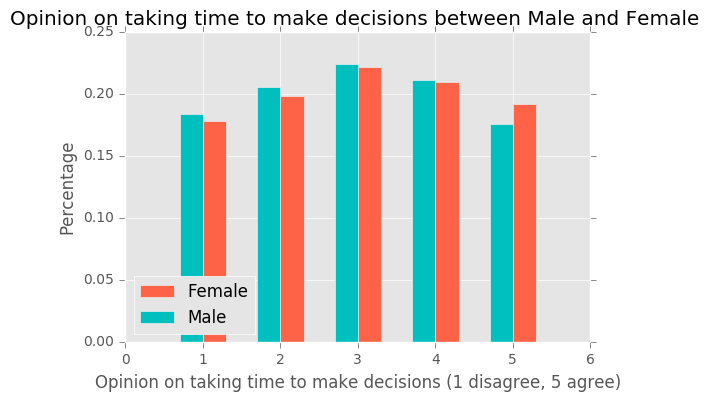

In [79]:
plt.bar(bar_locations, f_study['Decision making'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Decision making'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on taking time to make decisions (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on taking time to make decisions between Male and Female ')
plt.show()

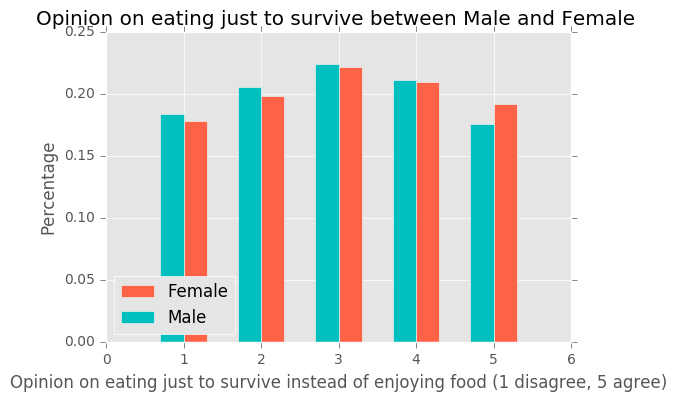

In [80]:
plt.bar(bar_locations, f_study['Eating to survive'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Eating to survive'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on eating just to survive instead of enjoying food (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on eating just to survive between Male and Female ')
plt.show()

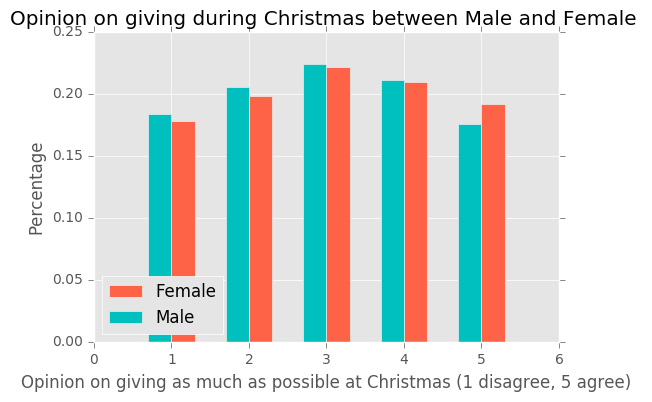

In [81]:
plt.bar(bar_locations, f_study['Giving'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Giving'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on giving as much as possible at Christmas (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on giving during Christmas between Male and Female ')
plt.show()

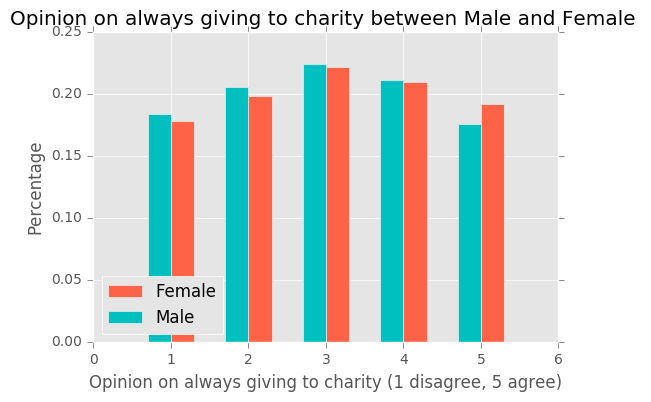

In [82]:
plt.bar(bar_locations, f_study['Charity'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Charity'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on always giving to charity (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on always giving to charity between Male and Female ')
plt.show()

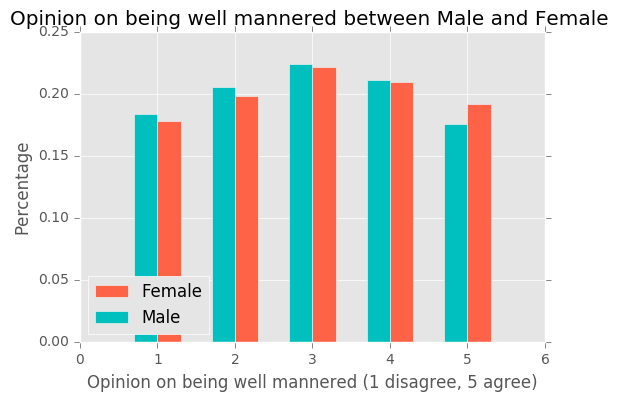

In [83]:
plt.bar(bar_locations, f_study['Appearence and gestures'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Appearence and gestures'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on being well mannered (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on being well mannered between Male and Female ')
plt.show()

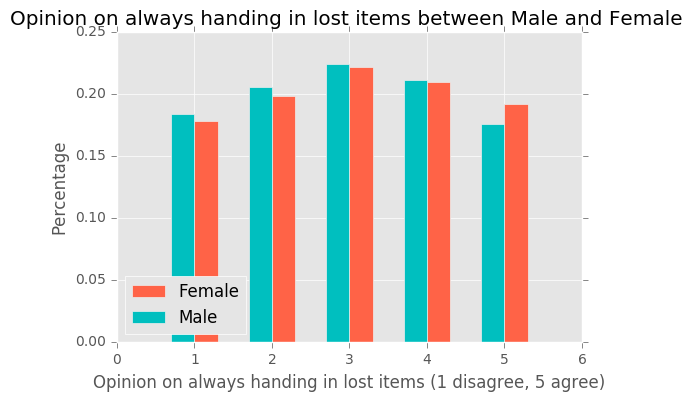

In [84]:
plt.bar(bar_locations, f_study['Finding lost valuables'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finding lost valuables'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on always handing in lost items (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on always handing in lost items between Male and Female ')
plt.show()

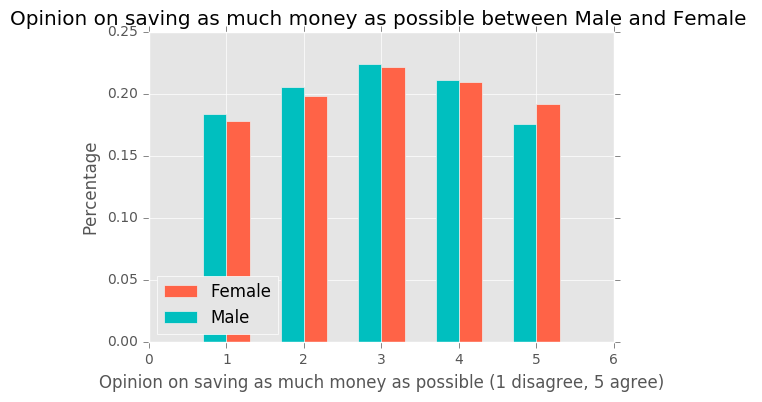

In [85]:
plt.bar(bar_locations, f_study['Finances'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on saving as much money as possible (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on saving as much money as possible between Male and Female ')
plt.show()

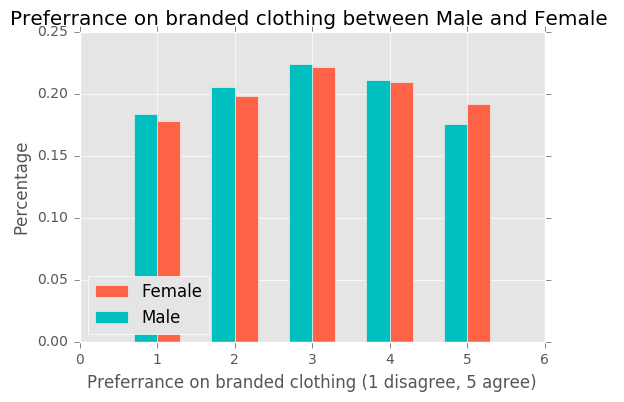

In [86]:
plt.bar(bar_locations, f_study['Branded clothing'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Branded clothing'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Preferrance on branded clothing (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Preferrance on branded clothing between Male and Female ')
plt.show()

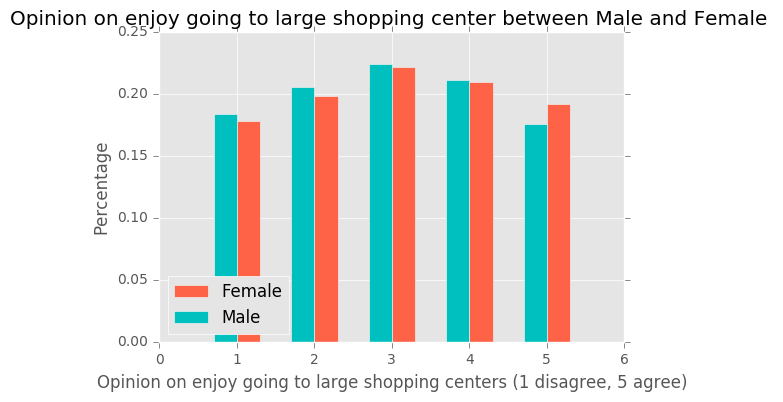

In [87]:
plt.bar(bar_locations, f_study['Shopping centres'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Shopping centres'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on enjoy going to large shopping centers (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on enjoy going to large shopping center between Male and Female ')
plt.show()

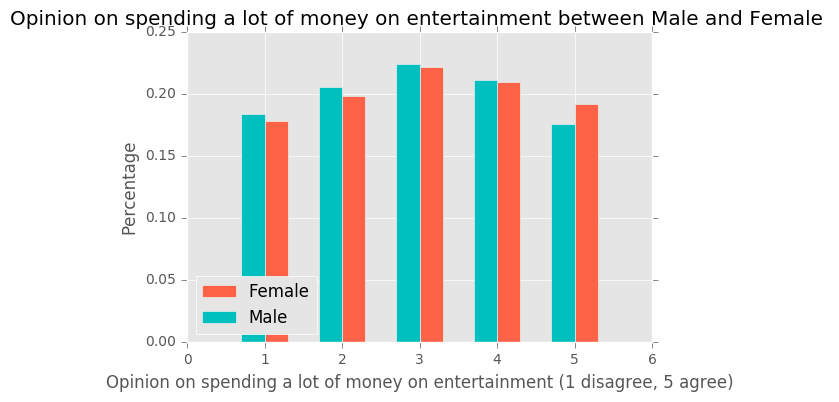

In [88]:
plt.bar(bar_locations, f_study['Entertainment spending'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on spending a lot of money on entertainment (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on entertainment between Male and Female ')
plt.show()

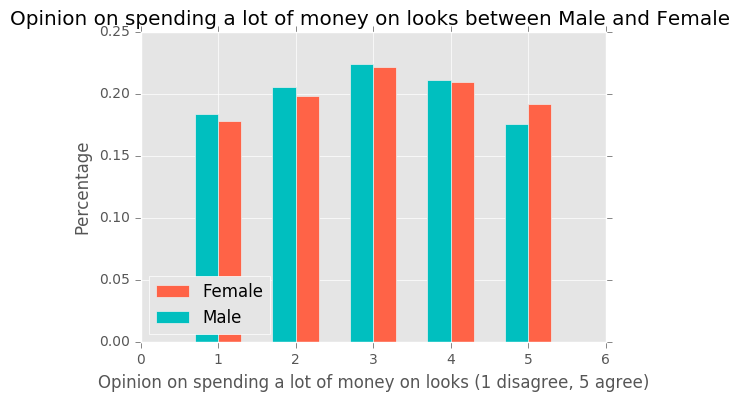

In [89]:
plt.bar(bar_locations, f_study['Spending on looks'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on spending a lot of money on looks (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on looks between Male and Female ')
plt.show()

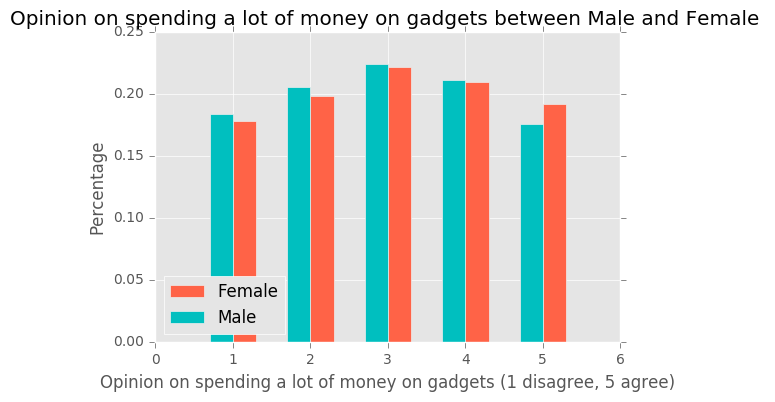

In [90]:
plt.bar(bar_locations, f_study['Spending on gadgets'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on spending a lot of money on gadgets (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on gadgets between Male and Female ')
plt.show()

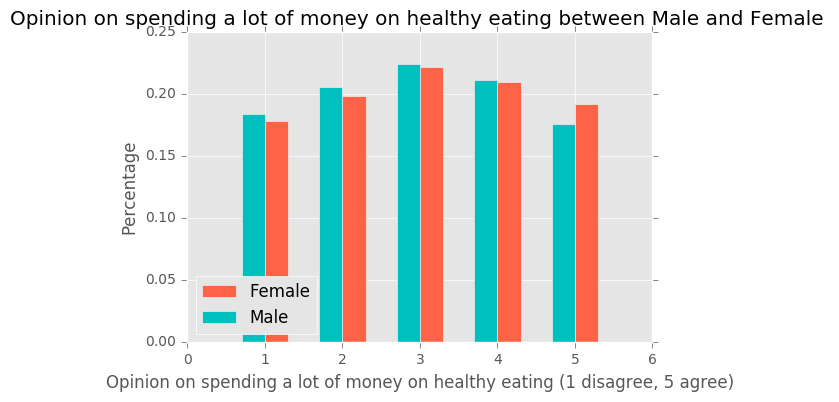

In [91]:
plt.bar(bar_locations, f_study['Spending on healthy eating'], bar_width, color = 'tomato', label = 'Female')
plt.bar(bar_locations - bar_width, m_study['Finances'], bar_width, color='c', label = 'Male')
plt.legend(["Female", "Male"], loc = 'lower left')
plt.xlabel('Opinion on spending a lot of money on healthy eating (1 disagree, 5 agree)')
plt.ylabel('Percentage')
plt.title('Opinion on spending a lot of money on healthy eating between Male and Female ')
plt.show()